In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [27]:
GM_Stock=pd.read_csv(r"C:\Users\Bubun\Downloads\Python-for-Finance-Repo-master\07-Stock-Market-Analysis-Capstone-Project\GM_Stock.csv",index_col="Date",parse_dates=True)

In [25]:
GM_Stock

,Open,High,Low,Close,Volume
Date,,,,,
2012-01-03,20.83,21.18,20.75,21.05,9321420
2012-01-04,21.05,21.37,20.75,21.15,7856752
2012-01-05,21.10,22.29,20.96,22.17,17884040
2012-01-06,22.26,23.03,22.24,22.92,18234608
2012-01-09,23.20,23.43,22.70,22.84,12091714
...,...,...,...,...,...
2016-12-23,35.83,35.87,35.54,35.69,9351152
2016-12-27,35.80,35.93,35.50,35.54,6008707
2016-12-28,35.74,35.80,35.13,35.15,8451852


In [28]:
%matplotlib inline

<Axes: xlabel='Date'>

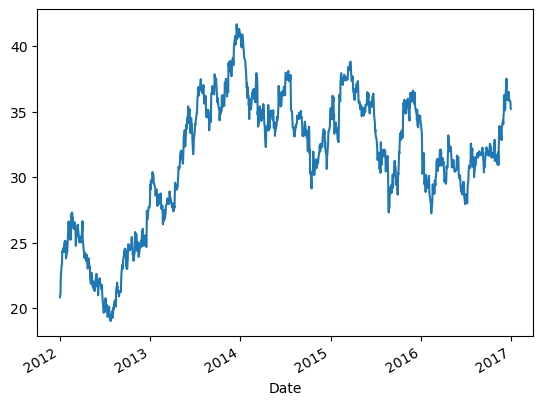

In [29]:
GM_Stock["Open"].plot()

In [30]:
Tesla_Stock=pd.read_csv(r"C:\Users\Bubun\Downloads\Python-for-Finance-Repo-master\07-Stock-Market-Analysis-Capstone-Project\Tesla_Stock.csv",index_col="Date",parse_dates=True)

In [31]:
Tesla_Stock

,Open,High,Low,Close,Volume
Date,,,,,
2012-01-03,28.94,29.50,27.65,28.08,928052
2012-01-04,28.21,28.67,27.50,27.71,630036
2012-01-05,27.76,27.93,26.85,27.12,1005432
2012-01-06,27.20,27.79,26.41,26.89,687081
2012-01-09,27.00,27.49,26.12,27.25,896951
...,...,...,...,...,...
2016-12-23,208.00,213.45,207.71,213.34,4670464
2016-12-27,214.88,222.25,214.42,219.53,5915732
2016-12-28,221.53,223.80,217.20,219.74,3782456


<Axes: xlabel='Date'>

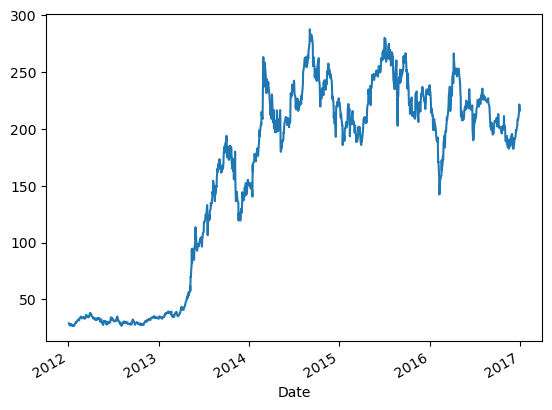

In [32]:
Tesla_Stock["Open"].plot()

In [33]:
Ford_Stock=pd.read_csv(r"C:\Users\Bubun\Downloads\Python-for-Finance-Repo-master\07-Stock-Market-Analysis-Capstone-Project\Ford_Stock.csv",index_col="Date",parse_dates=True)

In [34]:
Ford_Stock

,Open,High,Low,Close,Volume
Date,,,,,
2012-01-03,11.00,11.25,10.99,11.13,45709811
2012-01-04,11.15,11.53,11.07,11.30,79725188
2012-01-05,11.33,11.63,11.24,11.59,67877467
2012-01-06,11.74,11.80,11.52,11.71,59840605
2012-01-09,11.83,11.95,11.70,11.80,53981467
...,...,...,...,...,...
2016-12-23,12.43,12.46,12.36,12.46,15621178
2016-12-27,12.43,12.51,12.36,12.39,19467440
2016-12-28,12.37,12.45,12.22,12.25,26875381


<Axes: xlabel='Date'>

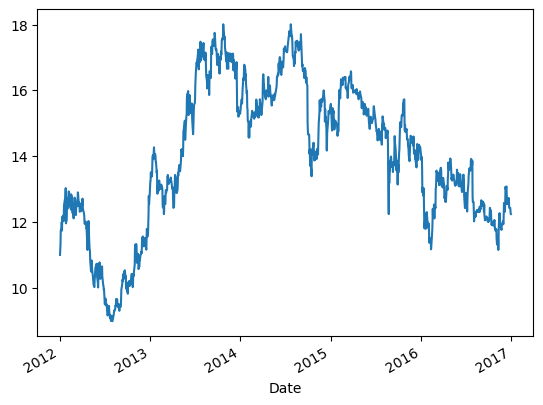

In [35]:
Ford_Stock["Open"].plot()

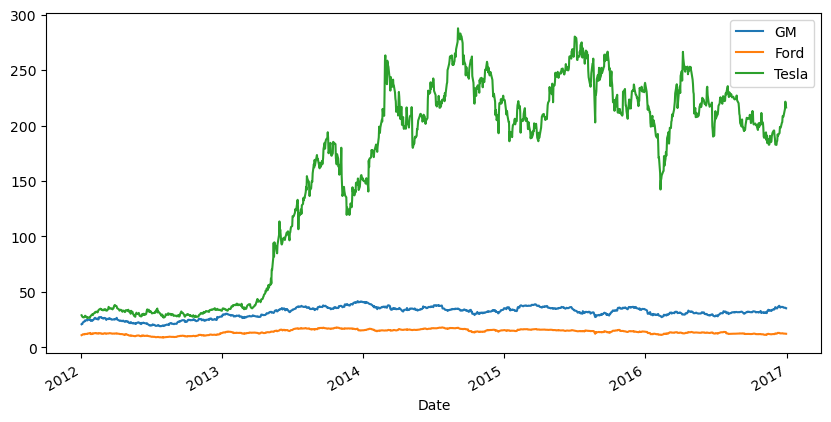

In [37]:
GM_Stock["Open"].plot(label="GM",figsize=(10,5))
Ford_Stock["Open"].plot(label="Ford")
Tesla_Stock["Open"].plot(label="Tesla")
plt.legend()

In [41]:
GM_Stock["Total traded"]=GM_Stock["Open"]*GM_Stock["Volume"]
Ford_Stock["Total traded"]=Ford_Stock["Open"]*Ford_Stock["Volume"]
Tesla_Stock["Total traded"]=Tesla_Stock["Open"]*Tesla_Stock["Volume"]

<Axes: xlabel='Date'>

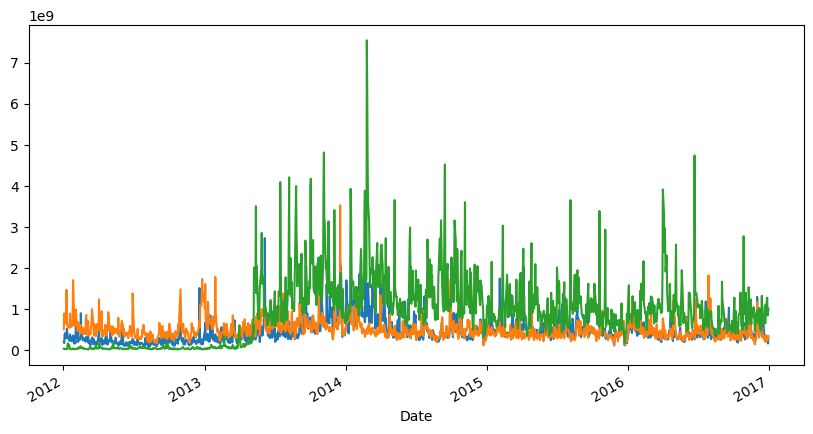

In [42]:
GM_Stock["Total traded"].plot(label="GM total traded",figsize=(10,5))
Ford_Stock["Total traded"].plot(label="Ford total traded")
Tesla_Stock["Total traded"].plot(label="Tesla total traded")

<Axes: xlabel='Date'>

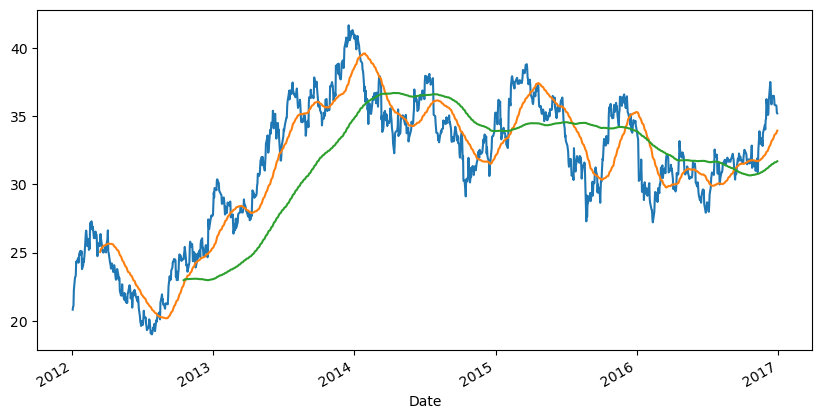

In [44]:

GM_Stock["Open"].plot(label="GM",figsize=(10,5))
GM_Stock["Open"].rolling(50).mean().plot(label="50 ma")
GM_Stock["Open"].rolling(200).mean().plot(label="200 ma")

In [45]:
GM_Stock["return"]=GM_Stock["Close"].pct_change(1)

<Axes: xlabel='Date'>

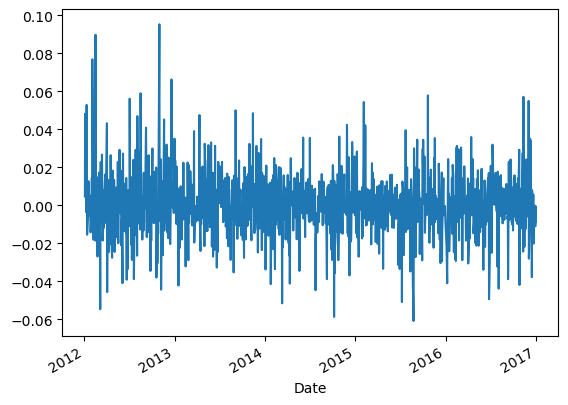

In [46]:
GM_Stock["return"].plot()

<Axes: >

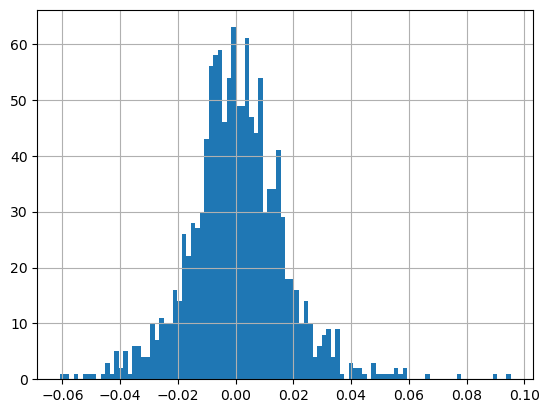

In [52]:
GM_Stock["return"].hist(label="return",bins=100)

<Axes: ylabel='Density'>

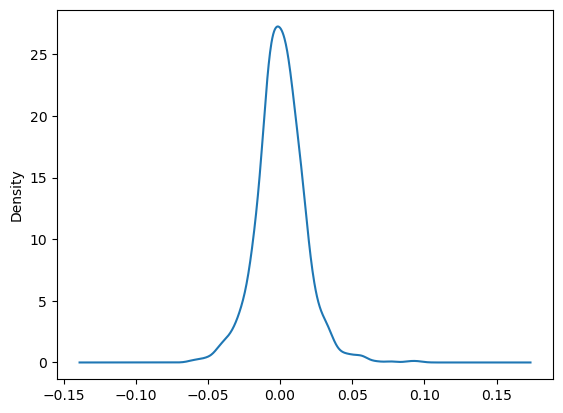

In [57]:
GM_Stock["return"].plot(kind="kde",label="return")

In [58]:
import statsmodels.api as sm

In [71]:
hp_cycle,hp_trend=sm.tsa.filters.hpfilter(GM_Stock["Open"],lamb=1296000)

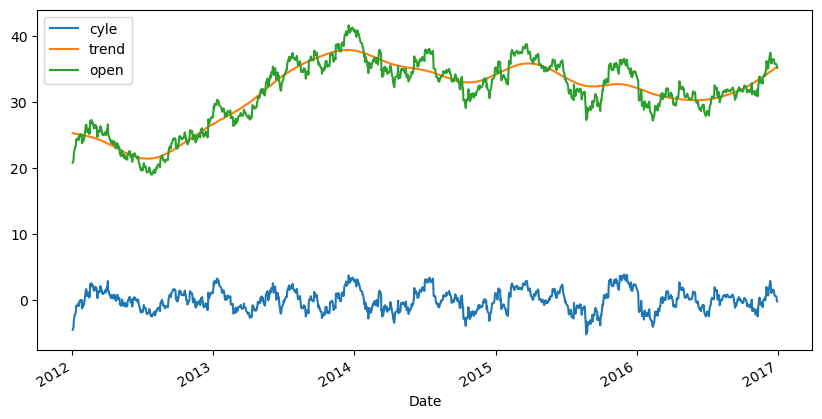

In [73]:
GM_Stock["cycle"]=hp_cycle
GM_Stock["trend"]=hp_trend
GM_Stock["cycle"].plot(label="cyle",figsize=(10,5))
GM_Stock["trend"].plot(label="trend")
GM_Stock["Open"].plot(label="open")
plt.legend()

In [74]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [78]:
df=pd.read_csv(r"C:\Users\Bubun\Downloads\Python-for-Finance-Repo-master\08-Time-Series-Analysis\airline_passengers.csv")

In [79]:
df

,Month,Thousands of Passengers
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0
...,...,...
140,1960-09,508.0
141,1960-10,461.0
142,1960-11,390.0
143,1960-12,432.0


In [80]:
df.dropna(inplace=True)

In [81]:
df

,Month,Thousands of Passengers
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0
...,...,...
139,1960-08,606.0
140,1960-09,508.0
141,1960-10,461.0
142,1960-11,390.0


In [82]:
df["Month"]=pd.to_datetime(df["Month"])
df.set_index("Month",inplace=True)

In [83]:
df

,Thousands of Passengers
Month,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0
...,...
1960-08-01,606.0
1960-09-01,508.0
1960-10-01,461.0


In [84]:
result=sm.tsa.seasonal_decompose(df["Thousands of Passengers"],m)

(<Figure size 640x480 with 4 Axes>,)

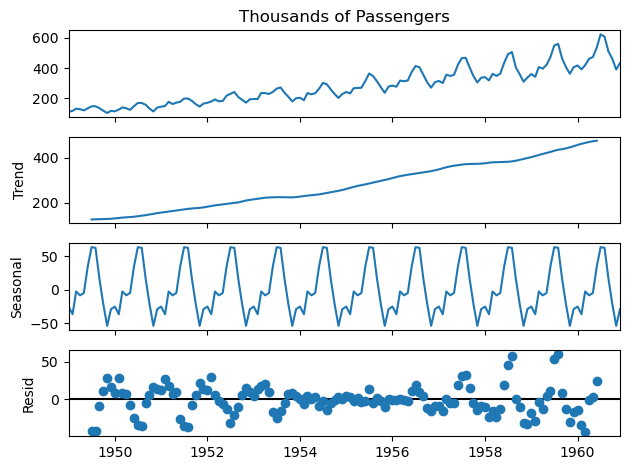

In [86]:
result.plot(),

In [103]:
resamp=GM_Stock.resample("M").mean()

In [104]:
resamp

,Open,High,Low,Close,Volume,Total traded,return,cycle,trend
Date,,,,,,,,,
2012-01-31,23.725000,24.127500,23.408000,23.865000,1.233119e+07,2.914950e+08,0.007145,-1.440878,25.165878
2012-02-29,26.041000,26.398500,25.620000,26.002000,1.310958e+07,3.401269e+08,0.004416,1.244590,24.796410
2012-03-31,25.554545,25.830000,25.258182,25.540000,7.969131e+06,2.039294e+08,-0.000498,1.358452,24.196093
2012-04-30,24.114000,24.460000,23.777000,24.043500,1.022436e+07,2.491795e+08,-0.005216,0.753826,23.360174
2012-05-31,22.130909,22.454091,21.857727,22.147273,9.569156e+06,2.128950e+08,-0.001489,-0.322761,22.453670
2012-06-30,21.273810,21.526190,20.904762,21.164286,8.992653e+06,1.907794e+08,-0.005486,-0.453966,21.727776
2012-07-31,19.673333,19.953810,19.420952,19.689524,7.743522e+06,1.524198e+08,0.000196,-1.792059,21.465392
2012-08-31,20.704783,21.073043,20.489565,20.804783,7.947926e+06,1.639721e+08,0.003687,-1.118846,21.823629
2012-09-30,23.329474,23.690000,23.064737,23.423158,9.151545e+06,2.138640e+08,0.003549,0.656854,22.672620


In [106]:
results=sm.tsa.seasonal_decompose(resamp["Open"])

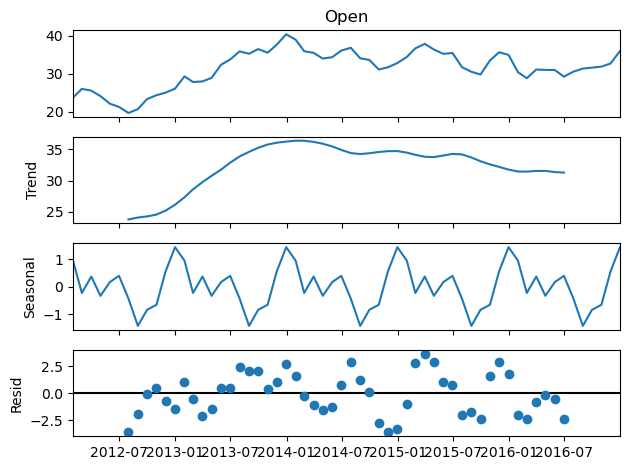

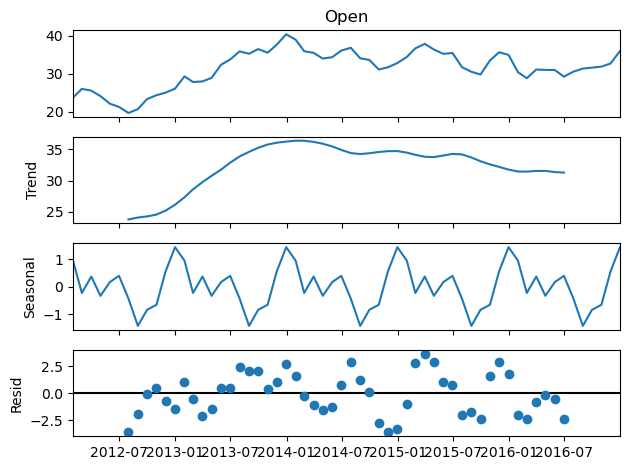

In [108]:
results.plot()

<Axes: xlabel='Date'>

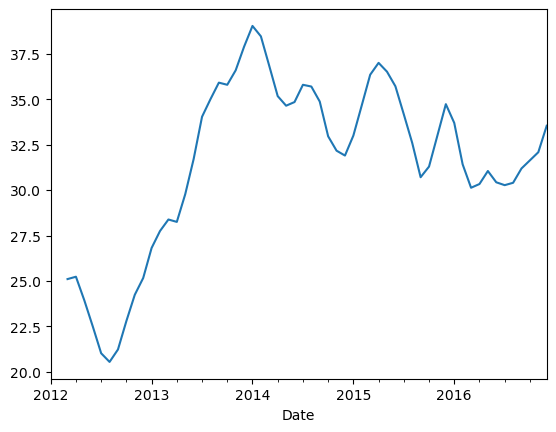

In [111]:
resamp["Open"].rolling(3).mean().plot()

<Axes: xlabel='Date'>

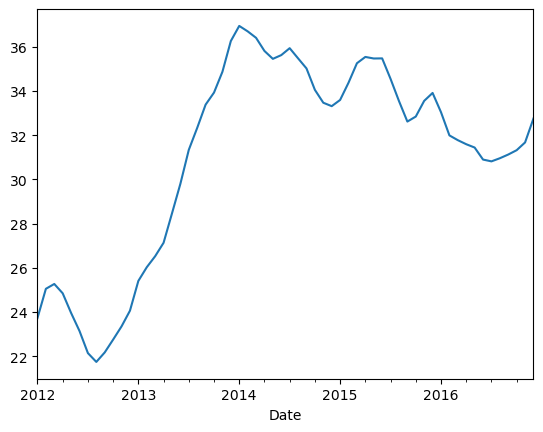

In [117]:
resamp["Open"].ewm(3).mean().plot()

In [118]:
resamp

,Open,High,Low,Close,Volume,Total traded,return,cycle,trend
Date,,,,,,,,,
2012-01-31,23.725000,24.127500,23.408000,23.865000,1.233119e+07,2.914950e+08,0.007145,-1.440878,25.165878
2012-02-29,26.041000,26.398500,25.620000,26.002000,1.310958e+07,3.401269e+08,0.004416,1.244590,24.796410
2012-03-31,25.554545,25.830000,25.258182,25.540000,7.969131e+06,2.039294e+08,-0.000498,1.358452,24.196093
2012-04-30,24.114000,24.460000,23.777000,24.043500,1.022436e+07,2.491795e+08,-0.005216,0.753826,23.360174
2012-05-31,22.130909,22.454091,21.857727,22.147273,9.569156e+06,2.128950e+08,-0.001489,-0.322761,22.453670
2012-06-30,21.273810,21.526190,20.904762,21.164286,8.992653e+06,1.907794e+08,-0.005486,-0.453966,21.727776
2012-07-31,19.673333,19.953810,19.420952,19.689524,7.743522e+06,1.524198e+08,0.000196,-1.792059,21.465392
2012-08-31,20.704783,21.073043,20.489565,20.804783,7.947926e+06,1.639721e+08,0.003687,-1.118846,21.823629
2012-09-30,23.329474,23.690000,23.064737,23.423158,9.151545e+06,2.138640e+08,0.003549,0.656854,22.672620


In [119]:
resamp.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Open,60.0,3.145679e+01,4.921813e+00,1.967333e+01,2.890549e+01,3.183609e+01,3.549528e+01,4.042429e+01
High,60.0,3.177700e+01,4.920765e+00,1.995381e+01,2.928088e+01,3.210043e+01,3.575090e+01,4.082714e+01
Low,60.0,3.110232e+01,4.898669e+00,1.942095e+01,2.861714e+01,3.151619e+01,3.505483e+01,3.999810e+01
Close,60.0,3.144575e+01,4.902380e+00,1.968952e+01,2.902115e+01,3.184218e+01,3.539619e+01,4.040429e+01
Volume,60.0,1.427425e+07,4.931695e+06,7.743522e+06,1.081116e+07,1.284295e+07,1.692150e+07,3.055779e+07
Total traded,60.0,4.633234e+08,2.108634e+08,1.524198e+08,3.257157e+08,4.310735e+08,5.569939e+08,1.098368e+09
return,60.0,5.605268e-04,3.379051e-03,-7.061395e-03,-1.805598e-03,4.454445e-04,2.880528e-03,7.233619e-03
cycle,60.0,-2.011848e-03,1.306690e+00,-2.588392e+00,-1.038653e+00,3.428619e-02,7.936752e-01,2.945086e+00
trend,60.0,3.145880e+01,4.632605e+00,2.146539e+01,3.004750e+01,3.259517e+01,3.483740e+01,3.789834e+01


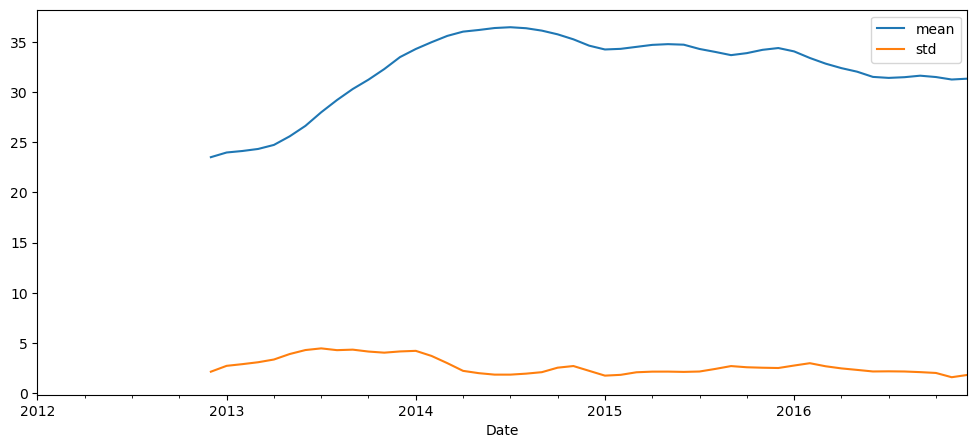

In [123]:
resamp["Open"].rolling(12).mean().plot(label="mean",figsize=(12,5))
resamp["Open"].rolling(12).std().plot(label="std")
plt.legend()

In [132]:
resu=sm.tsa.seasonal_decompose(resamp["Open"])

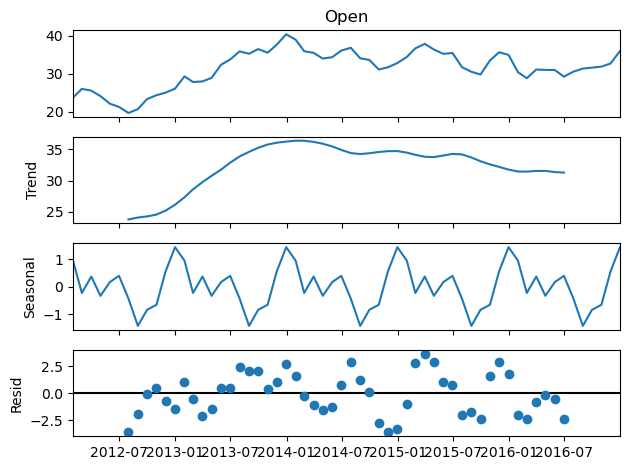

In [134]:
resu.plot();

In [135]:
from statsmodels.tsa.stattools import adfuller

In [136]:
adstest=adfuller(resamp["Open"])

In [137]:
adstest

(-1.8444188652585145,
 0.35864243050308386,
 1,
 58,
 {'1%': -3.548493559596539,
  '5%': -2.912836594776334,
  '10%': -2.594129155766944},
 190.74748798145043)

In [153]:

def add_check(x):
    result=adfuller(resamp["Open"])
    print("Augumented Dick-Fuller Test")
    labels=["ADF Test Statistic","p_values","# of lags","Num of observation"]
    
    for value,label in zip(result,labels):
        print(label+ ":" + str(value))
        
    if result[1] <= 0.05:
        print("strong evidence against null hypothesis")
        print("reject null hypothesis")
        print("data has no unnit root and is stationary")
    else:
        print("weak evidence against null hypothesis")
        print("fail to reject null hypothesis")
        print("data has unit root and it is stationary")

In [157]:
df

,Thousands of Passengers
Month,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0
...,...
1960-08-01,606.0
1960-09-01,508.0
1960-10-01,461.0


In [162]:
def add_check(x):
    result=adfuller(df["Thousands of Passengers"])
    print("Augumented Dick-Fuller Test")
    labels=["ADF Test Statistic","p_values","# of lags","Num of observation"]
    
    for value,label in zip(result,labels):
        print(label+ ":" + str(value))
        
    if result[1] <= 0.05:
        print("strong evidence against null hypothesis")
        print("reject null hypothesis")
        print("data has no unnit root and is stationary")
    else:
        print("weak evidence against null hypothesis")
        print("fail to reject null hypothesis")
        print("data has unit root and it is non stationary")

In [163]:
add_check(df["Thousands of Passengers"])

Augumented Dick-Fuller Test
ADF Test Statistic:0.815368879206051
p_values:0.991880243437641
# of lags:13
Num of observation:130
weak evidence against null hypothesis
fail to reject null hypothesis
data has unit root and it is non stationary


In [168]:
df["first difference"]=df["Thousands of Passengers"] - df["Thousands of Passengers"].shift(1)

In [169]:
add_check(df["first difference"])

Augumented Dick-Fuller Test
ADF Test Statistic:0.815368879206051
p_values:0.991880243437641
# of lags:13
Num of observation:130
weak evidence against null hypothesis
fail to reject null hypothesis
data has unit root and it is non stationary


In [172]:
df=pd.read_csv(r"C:\Users\Bubun\Downloads\Python-for-Finance-Repo-master\08-Time-Series-Analysis\monthly-milk-production-pounds-p.csv")

In [173]:
df

,Month,Monthly milk production: pounds per cow. Jan 62 ? Dec 75
0,1962-01,589.0
1,1962-02,561.0
2,1962-03,640.0
3,1962-04,656.0
4,1962-05,727.0
...,...,...
164,1975-09,817.0
165,1975-10,827.0
166,1975-11,797.0
167,1975-12,843.0


In [174]:
df.columns=["Month","Monthly milk production: pounds"]

In [175]:
df

,Month,Monthly milk production: pounds
0,1962-01,589.0
1,1962-02,561.0
2,1962-03,640.0
3,1962-04,656.0
4,1962-05,727.0
...,...,...
164,1975-09,817.0
165,1975-10,827.0
166,1975-11,797.0
167,1975-12,843.0


In [176]:
df.dropna()

,Month,Monthly milk production: pounds
0,1962-01,589.0
1,1962-02,561.0
2,1962-03,640.0
3,1962-04,656.0
4,1962-05,727.0
...,...,...
163,1975-08,858.0
164,1975-09,817.0
165,1975-10,827.0
166,1975-11,797.0


In [183]:
df

,Month,Monthly milk production: pounds
0,1962-01,589.0
1,1962-02,561.0
2,1962-03,640.0
3,1962-04,656.0
4,1962-05,727.0
...,...,...
164,1975-09,817.0
165,1975-10,827.0
166,1975-11,797.0
167,1975-12,843.0


In [184]:
df.columns=["Month","Monthly milk production: pounds"]


In [185]:
df["Month"]=pd.to_datetime(df["Month"])


ParserError: Unknown string format: Monthly milk production: pounds per cow. Jan 62 ? Dec 75 present at position 168